In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/Colab Notebooks/ZP

/content/drive/MyDrive/Colab Notebooks/ZP


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [52]:
autoscout_data=pd.read_csv('listings.csv')
autoscout_data.head(42)

,listing_url,make,model,version,price,Mileage,Gearbox,First registration,Fuel type,Power_kW,...,Doors,Colour,Manufacturer colour,Paint,Upholstery colour,Upholstery,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras
0,https://www.autoscout24.com/offers/nissan-x-tr...,Nissan,X-Trail,2.2 dci Urban Plus FL,2900.0,274000,Manual,10/2004,Diesel,100.0,...,5.0,Grey,NaN,NaN,NaN,Cloth,"Automatic climate control, Electrical side mir...","Bluetooth, CD player, Digital radio, MP3, Soun...","ABS, Alarm system, Central door lock, Driver-s...","Alloy wheels (16"")"
1,https://www.autoscout24.com/offers/mini-one-d-...,MINI,One D,AUTO PER COMMERCIANTE NON RICONDIZIONATA Mini 1.4,800.0,300000,Manual,10/2004,Diesel,55.0,...,3.0,Blue,NaN,Metallic,Black,Cloth,"Air conditioning, Electrical side mirrors, Lea...",NaN,"ABS, Central door lock, Central door lock with...",Smoker's package
2,https://www.autoscout24.com/offers/volvo-v40-v...,Volvo,V40,V40 II 2016 2.0 d2 R-design Momentum,5500.0,246000,Manual,07/2016,Diesel,88.0,...,5.0,White,NaN,NaN,Black,Cloth,"Armrest, Automatic climate control, Cruise con...","CD player, Digital cockpit, MP3, On-board comp...","Alarm system, Central door lock, Central door ...","Alloy wheels, Ambient lighting, Automatically ..."
3,https://www.autoscout24.com/offers/skoda-octav...,Skoda,Octavia,1.6 TDI CR 115 CV DSG Executive,4990.0,369500,Automatic,02/2019,Diesel,85.0,...,5.0,Black,Nero,Metallic,Black,Cloth,"Air conditioning, Armrest, Automatic climate c...",Bluetooth,"ABS, Central door lock, Driver-side airbag, El...",Alloy wheels
4,https://www.autoscout24.com/offers/chevrolet-c...,Chevrolet,Cruze,Hatchback 1.8 LT Gpl 141cv,4200.0,115000,Manual,04/2013,LPG,104.0,...,5.0,NaN,NaN,NaN,NaN,NaN,"Air conditioning, Armrest, Cruise control, Ele...","MP3, On-board computer, Radio, Sound system","ABS, Alarm system, Central door lock, Central ...",Alloy wheels
5,https://www.autoscout24.com/offers/renault-sce...,Renault,Scenic,Scenic X-Mod 1.5 dci Dynamique 110cv,2199.0,250000,Manual,11/2009,Diesel,81.0,...,5.0,Grey,NaN,Metallic,Black,Part leather,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Alarm system, Central door lock, Central ...","Alloy wheels, Ambient lighting"
6,https://www.autoscout24.com/offers/alfa-romeo-...,Alfa,Romeo MiTo,1.4 tb m.air Distinctive sport pack 135cv,3300.0,192000,Manual,03/2010,Gasoline,99.0,...,3.0,Black,NaN,NaN,NaN,Cloth,"Air conditioning, Leather steering wheel","Digital radio, MP3, Sound system","ABS, Driver-side airbag, Electronic stability ...","Alloy wheels (16""), Emergency tyre"
7,https://www.autoscout24.com/offers/mazda-rx-8-...,Mazda,RX-8,RX-8 1.3 Limited - 192 CV,6990.0,127000,Manual,03/2007,Gasoline,170.0,...,5.0,Blue,NaN,Metallic,NaN,NaN,"Armrest, Cruise control, Electrical side mirro...",NaN,"Alarm system, Central door lock, Fog lights, H...",Alloy wheels
8,https://www.autoscout24.com/offers/mg-zs-new-z...,MG,ZS,NEW ZS 1.5L MT STD,14890.0,10,Manual,01/2026,Gasoline,78.0,...,NaN,White,WHITE,Others,Black,Full leather,"Air conditioning, Cruise control, Leather seat...","Bluetooth, Digital radio, MP3, Sound system, USB","ABS, Electronic stability control, Power steering","Alloy wheels, Touch screen"
9,https://www.autoscout24.com/offers/mini-one-d-...,MINI,One D,Mini III R56 2007 Hatchback 1.6 s/clima LEGGI ...,4500.0,163000,Manual,06/2012,Diesel,66.0,...,3.0,Black,NaN,NaN,Black,Cloth,"Air conditioning, Armrest, Cruise control, Ele...","CD player, MP3, On-board computer, Radio, Soun...","ABS, Adaptive headlights, Alarm system, Centra...","All season tyres, Alloy wheels (15""), Ambient ..."


In [53]:
print(autoscout_data.shape)

(9411, 26)


## Ciscenje podataka

In [54]:
print(autoscout_data.isna().sum())

listing_url                 0
make                        4
model                      39
version                    83
price                       4
Mileage                     5
Gearbox                     5
First registration          5
Fuel type                   5
Power_kW                   12
Power_hp                   12
Seller                     31
Body type                   6
Vehicle type                7
Drivetrain               1535
Seats                     180
Doors                     195
Colour                   1379
Manufacturer colour      6637
Paint                    2564
Upholstery colour        3037
Upholstery               2323
Comfort & Convenience     914
Entertainment & Media    1580
Safety & Security         923
Extras                   1664
dtype: int64


### Uklanjanje redaka di fali make, model, First registration ili price

In [55]:
autoscout_data=autoscout_data.dropna(subset=['make','model','First registration','price'])
print(autoscout_data.shape)
print(autoscout_data.isna().sum())

(9371, 26)
listing_url                 0
make                        0
model                       0
version                    77
price                       0
Mileage                     0
Gearbox                     0
First registration          0
Fuel type                   0
Power_kW                    7
Power_hp                    7
Seller                      1
Body type                   1
Vehicle type                2
Drivetrain               1523
Seats                     166
Doors                     180
Colour                   1371
Manufacturer colour      6602
Paint                    2543
Upholstery colour        3008
Upholstery               2305
Comfort & Convenience     892
Entertainment & Media    1552
Safety & Security         903
Extras                   1634
dtype: int64


### Prag za uklanjanje redaka


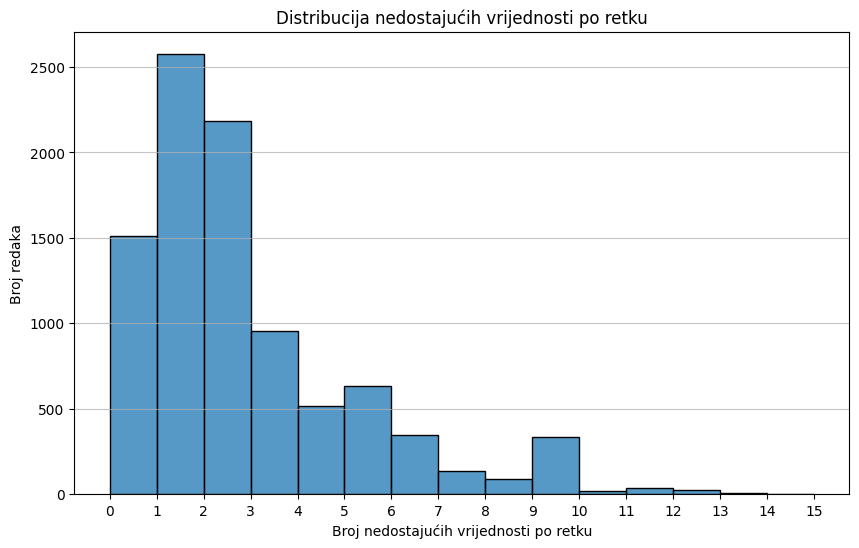

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(autoscout_data.isna().sum(axis=1), bins=range(0, autoscout_data.isna().sum(axis=1).max() + 2), kde=False)
plt.title('Distribucija nedostajućih vrijednosti po retku')
plt.xlabel('Broj nedostajućih vrijednosti po retku')
plt.ylabel('Broj redaka')
plt.xticks(range(0, autoscout_data.isna().sum(axis=1).max() + 2))
plt.grid(axis='y', alpha=0.75)
plt.show()

Na temelju distribucije nedostajućih vrijednosti po retku, postavit ćemo prag na 3, što znači da ćemo ukloniti sve retke koji imaju više od 3 nedostajuće vrijednosti. Ovo osigurava da zadržavamo retke koji su relativno potpuni dok eliminiramo one s potencijalno previše praznih podataka.

In [57]:
initial_shape = autoscout_data.shape
autoscout_data_cleaned = autoscout_data.dropna(thresh=autoscout_data.shape[1] - 3)
print(f"Originalni oblik DataFramea: {initial_shape}")
print(f"Novi oblik DataFramea nakon uklanjanja redaka s 4 ili više nedostajućih vrijednosti: {autoscout_data_cleaned.shape}")
autoscout_data = autoscout_data_cleaned

Originalni oblik DataFramea: (9371, 26)
Novi oblik DataFramea nakon uklanjanja redaka s 4 ili više nedostajućih vrijednosti: (7227, 26)


In [58]:
print(autoscout_data.isna().sum())

listing_url                 0
make                        0
model                       0
version                    19
price                       0
Mileage                     0
Gearbox                     0
First registration          0
Fuel type                   0
Power_kW                    3
Power_hp                    3
Seller                      0
Body type                   0
Vehicle type                0
Drivetrain                507
Seats                      13
Doors                      35
Colour                    180
Manufacturer colour      4666
Paint                    1531
Upholstery colour        1349
Upholstery                665
Comfort & Convenience      30
Entertainment & Media     333
Safety & Security          43
Extras                    427
dtype: int64


In [59]:
print(autoscout_data.duplicated().sum())

23


23 duplikata, uklanjamo ih.

In [60]:
data=autoscout_data.drop_duplicates()
print(data.duplicated().sum())

0


In [61]:
print(autoscout_data.dtypes)

listing_url               object
make                      object
model                     object
version                   object
price                    float64
Mileage                   object
Gearbox                   object
First registration        object
Fuel type                 object
Power_kW                 float64
Power_hp                 float64
Seller                    object
Body type                 object
Vehicle type              object
Drivetrain                object
Seats                    float64
Doors                    float64
Colour                    object
Manufacturer colour       object
Paint                     object
Upholstery colour         object
Upholstery                object
Comfort & Convenience     object
Entertainment & Media     object
Safety & Security         object
Extras                    object
dtype: object


### Uklananje listing_url stupca jer nije bas relevantan za ovaj projekt.

In [62]:
autoscout_data=autoscout_data.drop('listing_url',axis=1)
print(autoscout_data.shape)
print(autoscout_data.head(5))

(7227, 25)
      make    model                                            version  \
0   Nissan  X-Trail                              2.2 dci Urban Plus FL   
1     MINI    One D  AUTO PER COMMERCIANTE NON RICONDIZIONATA Mini 1.4   
2    Volvo      V40               V40 II 2016 2.0 d2 R-design Momentum   
3    Skoda  Octavia                    1.6 TDI CR 115 CV DSG Executive   
5  Renault   Scenic               Scenic X-Mod 1.5 dci Dynamique 110cv   

    price Mileage    Gearbox First registration Fuel type  Power_kW  Power_hp  \
0  2900.0  274000     Manual            10/2004    Diesel     100.0     136.0   
1   800.0  300000     Manual            10/2004    Diesel      55.0      75.0   
2  5500.0  246000     Manual            07/2016    Diesel      88.0     120.0   
3  4990.0  369500  Automatic            02/2019    Diesel      85.0     116.0   
5  2199.0  250000     Manual            11/2009    Diesel      81.0     110.0   

   ... Doors Colour Manufacturer colour     Paint  Uphols

## Uklanjanje Manufacturer color stupca
Uklanjamo ga jer večina ljudi ostavlja prazno ili lupeta gluposti.

In [63]:
autoscout_data=autoscout_data.drop(['Manufacturer colour'],axis=1)
print(autoscout_data.shape)

(7227, 24)


## Provjera broja jedinstvenih vrijednosti u relevantnim stupcima

In [64]:
categorical_cols = autoscout_data.select_dtypes(include='object').columns
print(f"Kategoricki stupci za enkodiranje: {list(categorical_cols)}")

version_unique_count = autoscout_data['version'].nunique()
print(f"Broj jedinstvenih vrijednosti u version stupcu: {version_unique_count}")
colour_unique_count = autoscout_data['Colour'].nunique()
print(f"Broj jedinstvenih vrijednosti u Colour stupcu: {colour_unique_count}")
upholstery_unique_count = autoscout_data['Upholstery'].nunique()
print(f"Broj jedinstvenih vrijednosti u Upholstery stupcu: {upholstery_unique_count}")
upholstery_colour_unique_count = autoscout_data['Upholstery colour'].nunique()
print(f"Broj jedinstvenih vrijednosti u Upholstery colour stupcu: {upholstery_colour_unique_count}")

Kategoricki stupci za enkodiranje: ['make', 'model', 'version', 'Mileage', 'Gearbox', 'First registration', 'Fuel type', 'Seller', 'Body type', 'Vehicle type', 'Drivetrain', 'Colour', 'Paint', 'Upholstery colour', 'Upholstery', 'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'Extras']
Broj jedinstvenih vrijednosti u version stupcu: 4666
Broj jedinstvenih vrijednosti u Colour stupcu: 14
Broj jedinstvenih vrijednosti u Upholstery stupcu: 6
Broj jedinstvenih vrijednosti u Upholstery colour stupcu: 11


## Uklanjanje version stupca


In [65]:
autoscout_data=autoscout_data.drop('version',axis=1)
print(autoscout_data.shape)

(7227, 23)


### Konverzija 'First registration' u 'Age' i čišćenje numeričkih stupaca

In [66]:
from datetime import datetime

autoscout_data['First registration'] = pd.to_datetime(autoscout_data['First registration'], format='%m/%Y', errors='coerce')

# Uzmi godinu prve registracije
autoscout_data['Registration_Year'] = autoscout_data['First registration'].dt.year

current_year = datetime.now().year
autoscout_data['Age'] = current_year - autoscout_data['Registration_Year']
autoscout_data = autoscout_data.drop(columns=['First registration', 'Registration_Year'])

# Ako ima NaN vrijednosti napuni ih medijanom
if autoscout_data['Age'].isna().sum() > 0:
    autoscout_data['Age'] = autoscout_data['Age'].fillna(autoscout_data['Age'].median())
print(autoscout_data[['Age']].head())

    Age
0  22.0
1  22.0
2  10.0
3   7.0
5  17.0


In [67]:
# Konverzija Mileage stupca u numerički
autoscout_data['Mileage'] = pd.to_numeric(autoscout_data['Mileage'], errors='coerce')

# Popuni NaN medijanom
if autoscout_data['Mileage'].isna().sum() > 0:
    autoscout_data['Mileage'] = autoscout_data['Mileage'].fillna(autoscout_data['Mileage'].median())
print(autoscout_data[['Mileage']].head())

    Mileage
0  274000.0
1  300000.0
2  246000.0
3  369500.0
5  250000.0


In [68]:
# Popuni NaN u Power_kW i Power_hp medijanom
for col in ['Power_kW', 'Power_hp']:
    if autoscout_data[col].isna().sum() > 0:
        autoscout_data[col] = autoscout_data[col].fillna(autoscout_data[col].median())
print(autoscout_data[['Power_kW', 'Power_hp']].head())

   Power_kW  Power_hp
0     100.0     136.0
1      55.0      75.0
2      88.0     120.0
3      85.0     116.0
5      81.0     110.0


## Matrica korelacija

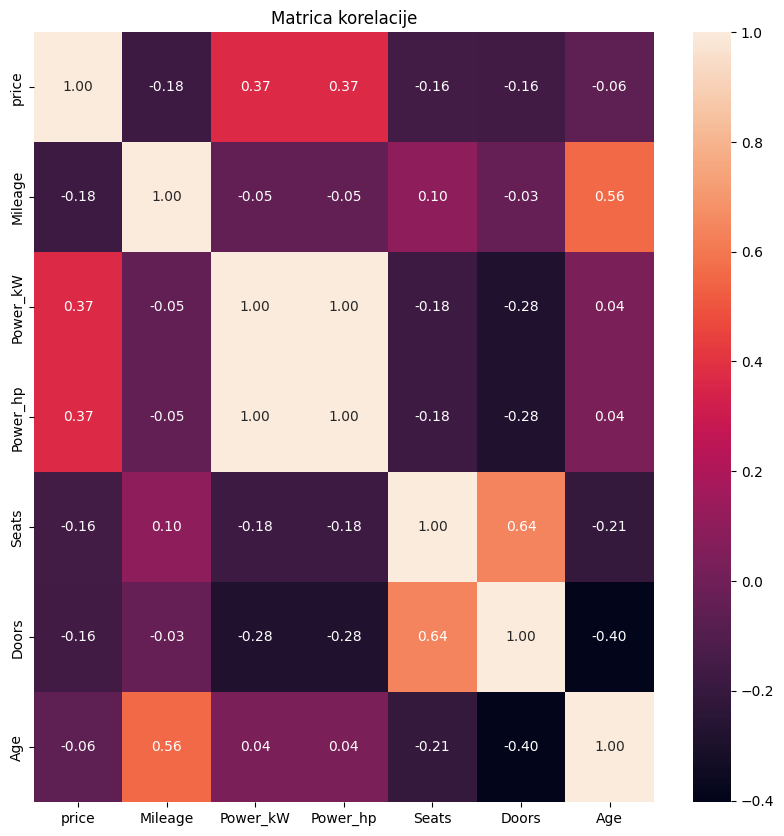

In [69]:
numeric_df=autoscout_data.select_dtypes(include=np.number)
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),annot=True,fmt='.2f')
plt.title('Matrica korelacije')
plt.show()

Power_hp i Power_kW su savršeno korelirani odnosno prenose istu informaciju tako da možemo maknit jedan od njih.

In [70]:
autoscout_data = autoscout_data.drop(columns=['Power_kW'])
print(autoscout_data.shape)

(7227, 22)


## Enkodiranje

### Pregled jedinstvenih vrijednosti u kategorickim stupcima

In [71]:
for column in autoscout_data.select_dtypes(include='object').columns:
    print(f"Column: {column}")
    print(autoscout_data[column].value_counts())
    print("\n" + "-"*50 + "\n")

Column: make
make
Fiat             672
Mercedes-Benz    614
Volkswagen       603
BMW              539
Audi             538
                ... 
DFSK               1
Rolls-Royce        1
9ff                1
SWM                1
Tiger              1
Name: count, Length: 77, dtype: int64

--------------------------------------------------

Column: model
model
Panda        166
Golf         139
500          136
A3           100
Polo          94
            ... 
210/310        1
93             1
106            1
Proace         1
Traveller      1
Name: count, Length: 776, dtype: int64

--------------------------------------------------

Column: Gearbox
Gearbox
Manual            4021
Automatic         2868
Semi-automatic     327
-                   11
Name: count, dtype: int64

--------------------------------------------------

Column: Fuel type
Fuel type
Diesel                                                                                                                    3166
Gasoline   

In [72]:
feature_cols = ['Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'Extras']

# Skup za pohranu svih jedinstvenih značajki
all_unique_features = set()

for col in feature_cols:
    # Puni NaN praznim stringom
    autoscout_data[col] = autoscout_data[col].fillna('')
    # Diejli string po zarezima, mice praznine i filtrira prazne stringove
    autoscout_data[col] = autoscout_data[col].apply(lambda x: [item.strip() for item in x.split(',') if item.strip()])
    # Dodaje značajke u skup svih jedinstvenih značajki
    for feature_list in autoscout_data[col]:
        all_unique_features.update(feature_list)

unique_features_list = list(all_unique_features)
print(f"Ekstrahirano {len(unique_features_list)} jedinstvenih značajki.")
print("Prvih 20 jedinstvenih značajki:", unique_features_list[:20])

# Novi one-hot kodirani stupci za svaku jedinstvenu značajku
one_hot_encoded_features_df = pd.DataFrame(index=autoscout_data.index)

for feature in unique_features_list:
    # Kreira novi stupac'feature_X' gdje je X naziv značajke
    col_name = f'feature_{feature.replace(" ", "_").replace("-", "_").replace("/", "_")}'
    one_hot_encoded_features_df[col_name] = 0

    # Provjerava prisutnost značajke u bilo kojem od izvornih stupaca značajki za svaki redak
    for original_feature_col in feature_cols:
        one_hot_encoded_features_df[col_name] = one_hot_encoded_features_df[col_name] | \
                                                autoscout_data[original_feature_col].apply(lambda x: 1 if feature in x else 0)

# Izbacuje izvorne stupce
autoscout_data = autoscout_data.drop(columns=feature_cols)

autoscout_data = pd.concat([autoscout_data, one_hot_encoded_features_df], axis=1)

print("Oblik nakon ekstrakcije značajki i one-hot kodiranja:", autoscout_data.shape)
print(autoscout_data.head())

Ekstrahirano 145 jedinstvenih značajki.
Prvih 20 jedinstvenih značajki: ['Start-stop system', 'Alarm system', 'Massage seats', 'Ski bag', 'Driver-side airbag', 'Alloy wheels (21")', 'Touch screen', 'Adaptive Cruise Control', 'Electronic parking brake', 'Electric tailgate', 'Cargo barrier', 'Bluetooth', 'Fold flat passenger seat', 'Radio', 'Emergency tyre', 'Seat heating', 'Right hand drive', 'Hands-free equipment', 'Alloy wheels (17")', 'Side airbag']


/tmp/ipython-input-3464878623.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded_features_df[col_name] = 0
/tmp/ipython-input-3464878623.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded_features_df[col_name] = 0
/tmp/ipython-input-3464878623.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, 

Oblik nakon ekstrakcije značajki i one-hot kodiranja: (7227, 163)
      make    model   price   Mileage    Gearbox Fuel type  Power_hp  Seller  \
0   Nissan  X-Trail  2900.0  274000.0     Manual    Diesel     136.0  Dealer   
1     MINI    One D   800.0  300000.0     Manual    Diesel      75.0  Dealer   
2    Volvo      V40  5500.0  246000.0     Manual    Diesel     120.0  Dealer   
3    Skoda  Octavia  4990.0  369500.0  Automatic    Diesel     116.0  Dealer   
5  Renault   Scenic  2199.0  250000.0     Manual    Diesel     110.0  Dealer   

          Body type Vehicle type  ... feature_Tire_pressure_monitoring_system  \
0  Off-Road/Pick-up         Used  ...                                       0   
1             Sedan         Used  ...                                       0   
2             Sedan         Used  ...                                       1   
3             Sedan         Used  ...                                       0   
5               Van         Used  ...           

/tmp/ipython-input-3464878623.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_encoded_features_df[col_name] = 0


In [73]:
# Preostali stupci koje triba enkodirat
categorical_cols_for_ohe = autoscout_data.select_dtypes(include='object').columns
print(f"Preostali kategorijski stupci za one-hot kodiranje: {list(categorical_cols_for_ohe)}")

# One Hot enkodiranje
autoscout_data = pd.get_dummies(autoscout_data, columns=categorical_cols_for_ohe, drop_first=True, dtype=int)

print("Konačni oblik nakon svih kodiranja:", autoscout_data.shape)
print(autoscout_data.head())

Preostali kategorijski stupci za one-hot kodiranje: ['make', 'model', 'Gearbox', 'Fuel type', 'Seller', 'Body type', 'Vehicle type', 'Drivetrain', 'Colour', 'Paint', 'Upholstery colour', 'Upholstery']
Konačni oblik nakon svih kodiranja: (7227, 1078)
    price   Mileage  Power_hp  Seats  Doors   Age  feature_Start_stop_system  \
0  2900.0  274000.0     136.0    5.0    5.0  22.0                          0   
1   800.0  300000.0      75.0    4.0    3.0  22.0                          0   
2  5500.0  246000.0     120.0    5.0    5.0  10.0                          1   
3  4990.0  369500.0     116.0    5.0    5.0   7.0                          0   
5  2199.0  250000.0     110.0    5.0    5.0  17.0                          0   

   feature_Alarm_system  feature_Massage_seats  feature_Ski_bag  ...  \
0                     1                      0                0  ...   
1                     0                      0                0  ...   
2                     1                      0       

## Distribucija

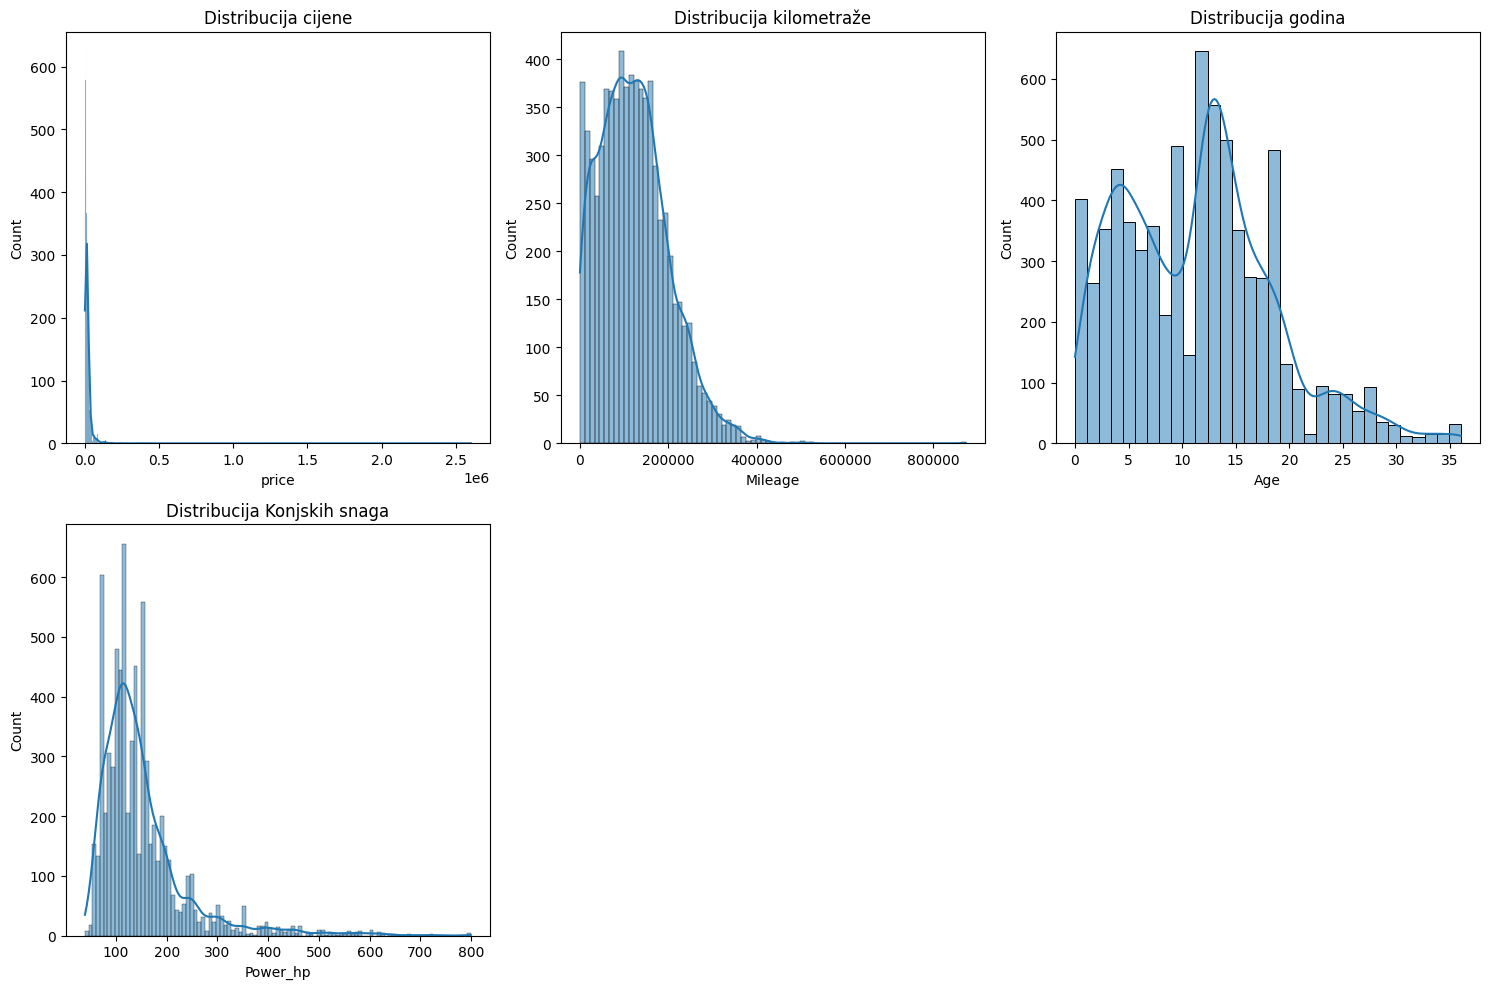

In [74]:
# Vizualizacija distribucija kljucnih numerickih znacajki
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(autoscout_data['price'], kde=True)
plt.title('Distribucija cijene')

plt.subplot(2, 3, 2)
sns.histplot(autoscout_data['Mileage'], kde=True)
plt.title('Distribucija kilometraže')

plt.subplot(2, 3, 3)
sns.histplot(autoscout_data['Age'], kde=True)
plt.title('Distribucija godina')

plt.subplot(2, 3, 4)
sns.histplot(autoscout_data['Power_hp'], kde=True)
plt.title('Distribucija Konjskih snaga')

plt.tight_layout()
plt.show()

## Detaljna analiza distribucije cijene

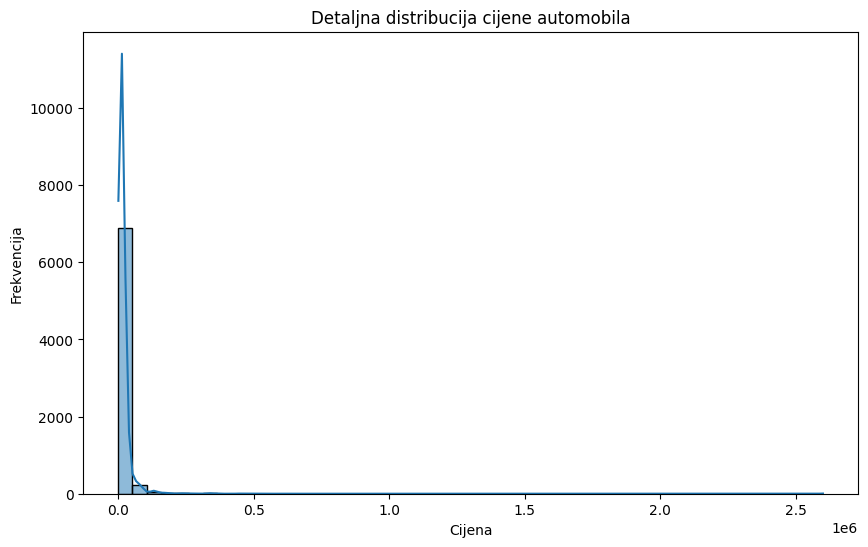

Skewness cijene: 37.76
Cijena je značajno pozitivno iskrivljena, koristi log-transformaciju.


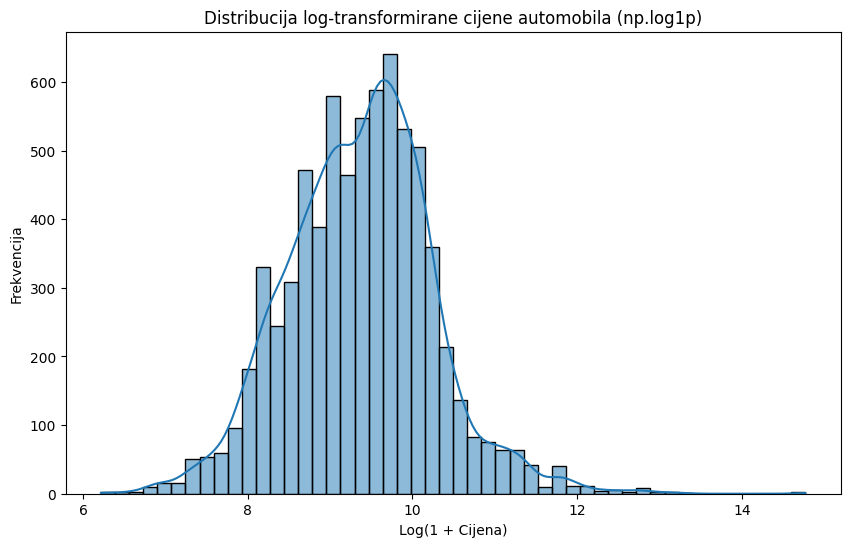

In [75]:
# Provjera distribucije cijene s KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(autoscout_data['price'], kde=True, bins=50)
plt.title('Detaljna distribucija cijene automobila')
plt.xlabel('Cijena')
plt.ylabel('Frekvencija')
plt.show()

# Provjera skewnessa
price_skewness = autoscout_data['price'].skew()
print(f"Skewness cijene: {price_skewness:.2f}")

if price_skewness > 0.5:
    print("Cijena je značajno pozitivno iskrivljena, koristi log-transformaciju.")
    # Vizualizacija log-transformirane cijene
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(autoscout_data['price']), kde=True, bins=50)
    plt.title('Distribucija log-transformirane cijene automobila (np.log1p)')
    plt.xlabel('Log(1 + Cijena)')
    plt.ylabel('Frekvencija')
    plt.show()

## Odnos cijene s ključnim numeričkim značajkama

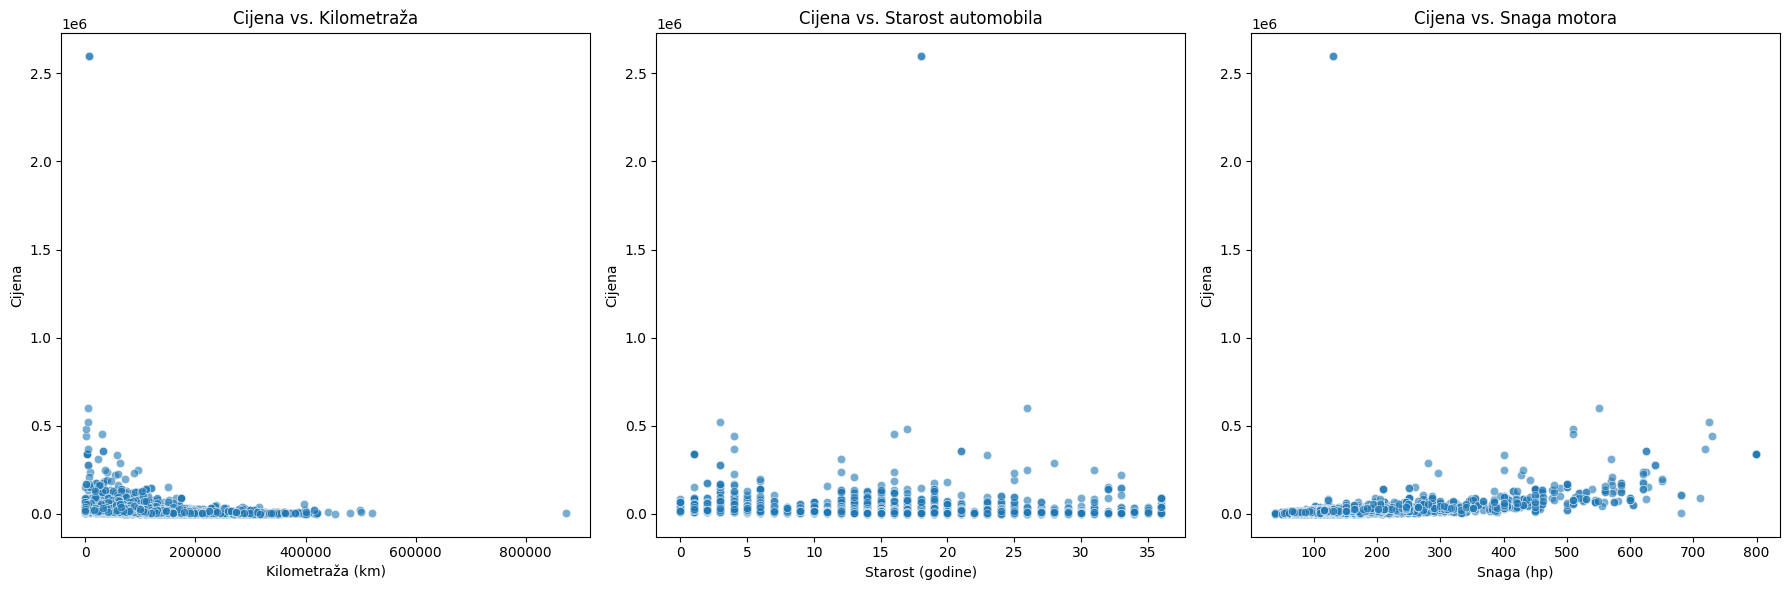

In [76]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Mileage', y='price', data=autoscout_data, alpha=0.6)
plt.title('Cijena vs. Kilometraža')
plt.xlabel('Kilometraža (km)')
plt.ylabel('Cijena')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='price', data=autoscout_data, alpha=0.6)
plt.title('Cijena vs. Starost automobila')
plt.xlabel('Starost (godine)')
plt.ylabel('Cijena')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Power_hp', y='price', data=autoscout_data, alpha=0.6)
plt.title('Cijena vs. Snaga motora')
plt.xlabel('Snaga (hp)')
plt.ylabel('Cijena')

plt.tight_layout()
plt.show()

## Uklanjanje outliera
Ekstremni outlieri mogu značajno iskriviti model i utjecati na točnost predikcija. Uklanjamo ciejene veće od 2.5 mil Eura.

In [77]:
print(f"Najviša cijena prije uklanjanja outliera: {autoscout_data['price'].max()} EUR")

# Uklanjanje outliera (cijene veće od 2.5 milijuna EUR)
autoscout_data = autoscout_data[autoscout_data['price'] < 2500000]

print(f"Oblik DataFramea nakon uklanjanja outliera: {autoscout_data.shape}")
print(f"Najviša cijena nakon uklanjanja outliera: {autoscout_data['price'].max()} EUR")

Najviša cijena prije uklanjanja outliera: 2600000.0 EUR
Oblik DataFramea nakon uklanjanja outliera: (7225, 1078)
Najviša cijena nakon uklanjanja outliera: 600000.0 EUR


## Train/Test Split

In [78]:
x=autoscout_data.drop('price',axis=1)
y=autoscout_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape x_train: {x_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print( f"Shape x_test: {x_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape x_train: (5780, 1077)
Shape y_train: (5780,)
Shape x_test: (1445, 1077)
Shape y_test: (1445,)


## RandomForestRegressor
Algoritam strojnog učenja koji se koristi za regresijske zadatke. Konstruira više stabala odluke tijekom treninga i ispisuje prosjek predviđanja pojedinih stabala.


In [79]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_pred_rf = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = root_mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 2441.09
Mean Squared Error (MSE): 114257225.72
Root Mean Squared Error (RMSE): 10689.12
R-squared (R2 Score): 0.85


Model pokazuje solidne performanse s visokim R2 rezultatom (0.85), objašnjavajući većinu varijacije u cijenama, ali MAE od oko 2441 EUR i RMSE od 10689 EUR sugeriraju da su apsolutna odstupanja predviđanja od stvarnih cijena i dalje značajna.

## Tuning Hiperparametara


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [87]:
param_dist = {
    'n_estimators': [100, 200, 300, 400], # Broj stabala odlučivanja u šumi
    'max_depth': [10, 30, 50, None],  # Maksimalna dubina stabla
    'min_samples_split': [2, 5],      # Minimalan broj uzoraka potreban za podjelu internog čvora
}

rf = RandomForestRegressor(random_state=42)

random_search = GridSearchCV(estimator=rf, param_grid=param_dist,
                                   cv=3, verbose=2, n_jobs=-1)

random_search.fit(x_train, y_train)

print("Najbolji parametri: ", random_search.best_params_)

best_rf_model = random_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Najbolji parametri:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [88]:
y_pred_tuned_rf = best_rf_model.predict(x_test)

mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = root_mean_squared_error(y_test, y_pred_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print(f"Tunirani Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_tuned_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rf:.2f}")
print(f"R-squared (R2 Score): {r2_tuned_rf:.2f}")

Tunirani Random Forest Regressor:
Mean Absolute Error (MAE): 2471.53
Mean Squared Error (MSE): 114863054.82
Root Mean Squared Error (RMSE): 10717.42
R-squared (R2 Score): 0.85


## Usporedba performansi modela nakon tuninga


Performanse modela nakon tuninga hiperparametara ({'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}) ostale vrlo slične originalnom modelu, s blagim pogoršanjem u MAE, MSE i RMSE vrijednostima. R2 rezultat je ostao isti. To sugerira da su početni hiperparametri bili prilično blizu optimalnim vrijednostima unutar definiranog pretraživačkog prostora, ili da su unutar ovog pretraživačkog prostora ovi parametri bili najbolji, ali nisu nužno doveli do značajnog poboljšanja. Moguće je da daljnjim istraživanjem šireg raspona hiperparametara dobijemo bolji rezultat.

## Rating i procjena vrijednosti automobila na temelju slika

In [ ]:
import google.generativeai as genai
from google.colab import userdata
import json

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

model = genai.GenerativeModel("gemini-2.5-pro")

all_cars_image_urls = [
    [
        "https://www.njuskalo.hr/image-xlsize/auti/audi-a4-30-tdi-tronic-acc-virtual-ambi-siber-kam-bang-olufsen-full-slika-250929000.jpg",
        "https://www.njuskalo.hr/image-xlsize/auti/audi-a4-30-tdi-tronic-acc-virtual-ambi-siber-kam-bang-olufsen-full-slika-250929033.jpg",
        "https://www.njuskalo.hr/image-xlsize/auti/audi-a4-30-tdi-tronic-acc-virtual-ambi-siber-kam-bang-olufsen-full-slika-250993387.jpg"
    ],
    [
        "https://www.njuskalo.hr/image-w920x690/auti/alfa-romeo-147-1.6-ts-slika-261844450.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/alfa-romeo-147-1.6-ts-slika-261844465.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/alfa-romeo-147-1.6-ts-slika-261844468.jpg"
    ],
    [
        "https://www.njuskalo.hr/image-w920x690/karambolirani-auti/bmw-serija-5-touring-520d-automatik-011god-karambol-ime-kupca-proda-slika-211176624.jpg",
        "https://www.njuskalo.hr/image-w920x690/karambolirani-auti/bmw-serija-5-touring-520d-automatik-011god-karambol-ime-kupca-proda-slika-211176622.jpg",
        "https://www.njuskalo.hr/image-w920x690/karambolirani-auti/bmw-serija-5-touring-520d-automatik-011god-karambol-ime-kupca-proda-slika-211176623.jpg"
    ],
    [
        "https://www.njuskalo.hr/image-w920x690/auti/mazda-3-homura-g140-automatic-2024-slika-267233050.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/mazda-3-homura-g140-automatic-2024-slika-267233055.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/mazda-3-homura-g140-automatic-2024-slika-267233053.jpg"
    ],
    [
        "https://www.njuskalo.hr/image-w920x690/auti/renault-twingo-rs-gordini-sport-1.6-16v-ime-kupca-koza-klima-slika-199298893.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/renault-twingo-rs-gordini-sport-1.6-16v-ime-kupca-koza-klima-slika-199298896.jpg",
        "https://www.njuskalo.hr/image-w920x690/auti/renault-twingo-rs-gordini-sport-1.6-16v-ime-kupca-koza-klima-slika-199298910.jpg"
    ]

]

prompt = """
Na temelju priložene 3 slike automobila:

1. Ocijeni ukupno stanje vozila na skali od 1 do 10
2. Procijeni tržišnu vrijednost vozila u EUR (raspon min–max)
3. Objasni koji vizualni faktori najviše utječu na cijenu

Odgovori u JSON formatu:
{
  "rating": number,
  "price_estimate": {
    "min": number,
    "max": number
  },
  "explanation": string
}
"""

all_car_predictions = []

for i, car_images in enumerate(all_cars_image_urls):
    print(f"Auto {i+1}...")
    try:
        response = model.generate_content(
            [
                prompt,
                *car_images
            ]
        )
        prediction = json.loads(response.text.replace('```json', '').replace('```', ''))
        all_car_predictions.append(prediction)
        print(f"Predikcija za auto {i+1}: {prediction.get('price_estimate')}")
    except Exception as e:
        print(f"Error auto {i+1}: {e}")
        all_car_predictions.append({"car_index": i+1, "error": str(e)})

print("\nPredikcije")
for i, prediction in enumerate(all_car_predictions):
    print(f"Car {i+1} Prediction: {prediction}")


/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


Auto 1...
Predikcija za auto 1: {'min': 26000, 'max': 33000}
Auto 2...
Predikcija za auto 2: {'min': 1200, 'max': 2000}
Auto 3...
Predikcija za auto 3: {'min': 2000, 'max': 4000}
Auto 4...
Predikcija za auto 4: {'min': 29000, 'max': 33000}
Auto 5...
Predikcija za auto 5: {'min': 6500, 'max': 8500}

Predikcije
Car 1 Prediction: {'rating': 9, 'price_estimate': {'min': 26000, 'max': 33000}, 'explanation': "Najveći utjecaj na cijenu ima izuzetno bogata i rijetka razina dodatne opreme, što se odmah vidi na slikama. Ključni vizualni faktori koji podižu vrijednost su: \n1. **Audi Virtual Cockpit**: Potpuno digitalna instrument ploča je skupa i vrlo tražena opcija. \n2. **Bang & Olufsen zvučni sustav**: Premium audio sustav vidljiv po oznakama na zvučnicima u vratima, što značajno povećava vrijednost. \n3. **Interijer i sjedala**: Kombinacija kože i Alcantare na sportskim sjedalima, zajedno s volanom ravnog dna, upućuje na S-line paket. Stanje interijera djeluje izvanredno očuvano, bez vidljiv

1. AUTO Audi A4 30 TDI S-TRONIC PRAVA CIJENA: 28.900 € PREDIKCIJA<26000,33000>.
2. AUTO Alfa Romeo 147 1,6 TS PRAVA CIJENA: 2.300 € PREDIKCIJA<1200,200>.
3. AUTO BMW serija 5 Touring 520d automatik 011god karambol PRAVA CIJENA: 4.399 € PREDIKCIJA<2000,4000>.
4. AUTO Mazda 3 G122 Homura PRAVA CIJENA: 25.000 € PREDIKCIJA<29000,33000>.
5. AUTO Renault Twingo Rs Gordini Sport 1,6 16V PRAVA CIJENA: 9.999 € PREDIKCIJA<6500,8500>.